In [1]:
# Question Type Numbers in Evaluation Set:
#{'color_room': 1335, 'color': 345, 'location': 270} total = 1950
# validation answer vocab: 35 words (including unk)
total_color_room = 1335
total_color = 345
total_location = 270
total_questions = 1950
validation_answer_vocab = 35

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def percent_right(file):
    counts = file['question_type'].value_counts()
    total_wrong = len(file.index)
    rights = np.empty([4])
    rights[0] = (total_questions - total_wrong) / total_questions
    rights[1] = (total_color_room - counts['color_room'])/total_color_room
    rights[2] = (total_color - counts['color'])/total_color
    rights[3] = (total_location - counts['location'])/total_location
    return rights

def agreement_to_gt(rights):
    agreement = np.empty(4)
    p_e = 1 / validation_answer_vocab
    agreement[0] = (rights[0] - p_e)/(1-p_e)
    agreement[1] = (rights[1] - p_e)/(1-p_e)
    agreement[2] = (rights[2] - p_e)/(1-p_e)
    agreement[3] = (rights[3] - p_e)/(1-p_e)
    return agreement

15
[0.38340875 0.39160608 0.45098039 0.25653595]


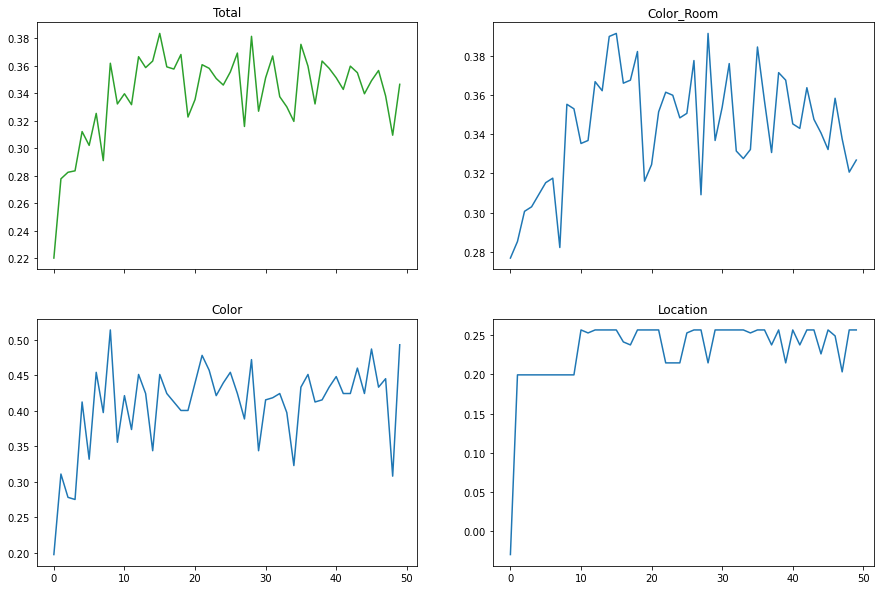

In [4]:
def produce_agreement_stats(experiment):
    agreement_list = []
    for c in range(0, 50):
        wrong_file = pd.read_csv("/home/yasmeen/Desktop/wrong_answers/{}/wrong_answers{}.csv".format(experiment, c))
        agreement_list.append(agreement_to_gt(percent_right(wrong_file)))
    agreement = np.stack(agreement_list)
    fig, axs = plt.subplots(2, 2, sharex=True)
    fig.set_size_inches(15, 10, forward=True)
    axs[0,0].plot(agreement[:,0], 'tab:green')
    axs[0, 0].set_title('Total')
    axs[0,1].plot(agreement[:,1])
    axs[0, 1].set_title('Color_Room')
    axs[1,0].plot(agreement[:,2])
    axs[1, 0].set_title('Color')
    axs[1,1].plot(agreement[:,3])
    axs[1, 1].set_title('Location')
    best_total_index = np.argmax(agreement, axis=0)[0]
    print(best_total_index)
    print(agreement[best_total_index])

    #return agreement
produce_agreement_stats('baseline_wrong_answer')

22
[0.39871795 0.40008813 0.50468883 0.25653595]


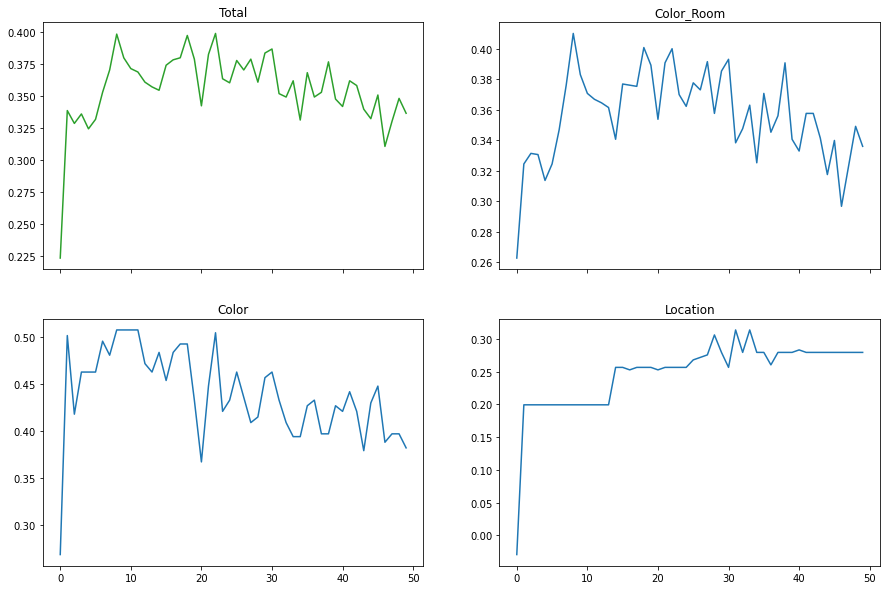

In [5]:
produce_agreement_stats('wrong_answers_category')

16
[0.39343891 0.39546156 0.49275362 0.25653595]


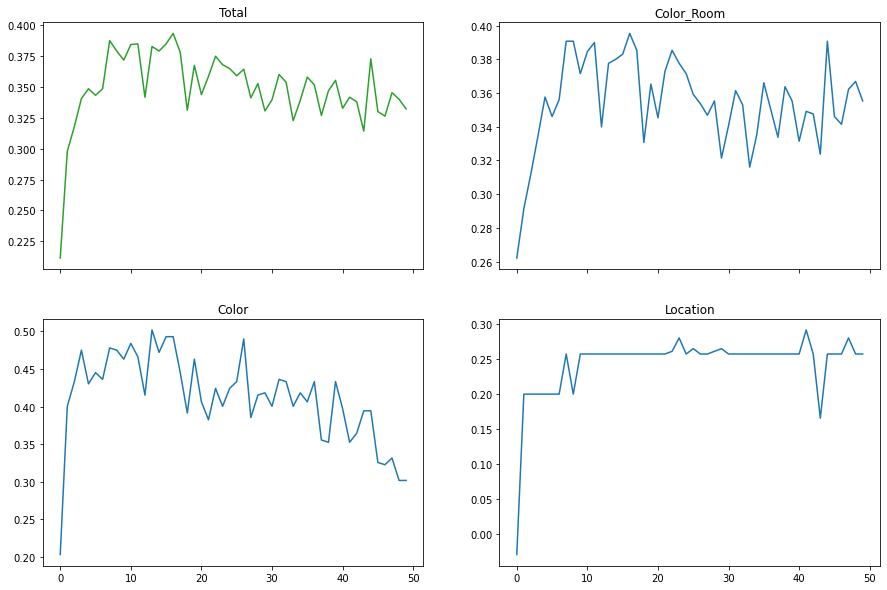

In [6]:
produce_agreement_stats('wrong_answers_look_around')

7
[0.34276018 0.34071381 0.4629156  0.19934641]


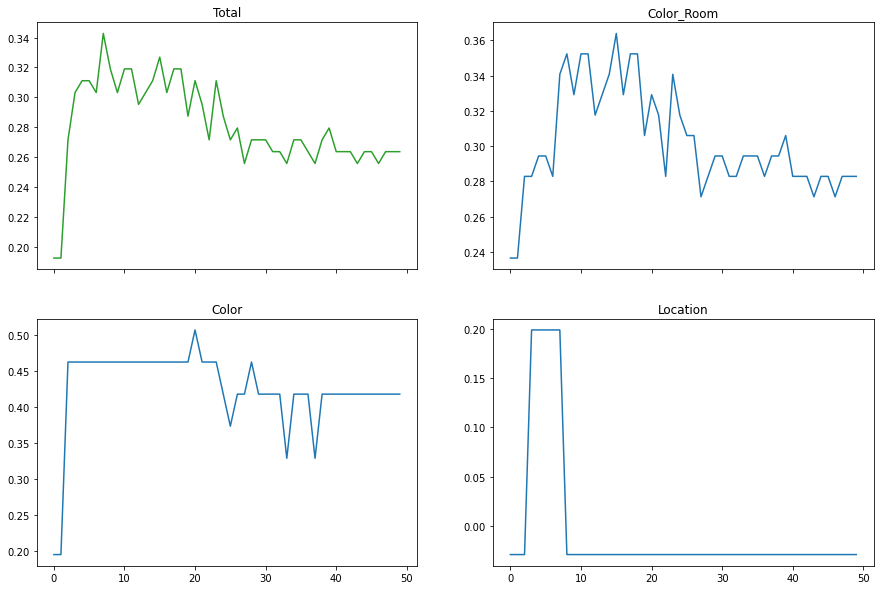

In [7]:
produce_agreement_stats('wrong_answers_fully_blind')

6
[0.38604827 0.40702798 0.45098039 0.19934641]


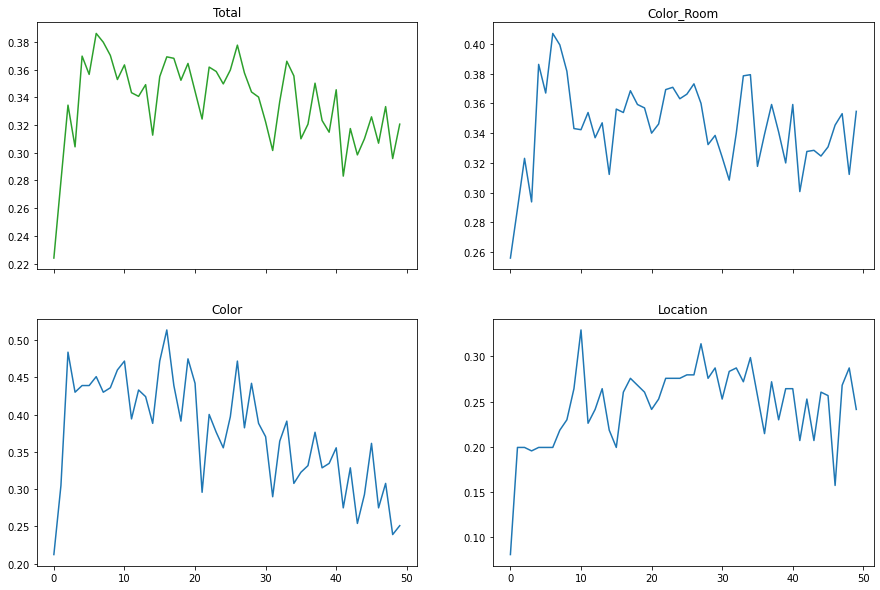

In [8]:
produce_agreement_stats('wrong_answers_boosted')